## Problem Statement
Use decision trees to prepare a model on fraud data treating those who have taxable_income <= 30000 as "Risky" and others are "Good"





Importing Libraries

In [1]:
#importing necessary libraries
import pandas as pd
import numpy as np
import sklearn
import pandas as pd
import numpy as np
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import accuracy_score
from sklearn import metrics
from sklearn.tree import DecisionTreeClassifier
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn import tree
from sklearn.metrics import confusion_matrix

In [2]:
# IMPORTING CSV FILE

In [4]:
df=pd.read_csv("Fraud_check.csv")

# EDA

In [5]:
df.head()

,Undergrad,Marital.Status,Taxable.Income,City.Population,Work.Experience,Urban
0,NO,Single,68833,50047,10,YES
1,YES,Divorced,33700,134075,18,YES
2,NO,Married,36925,160205,30,YES
3,YES,Single,50190,193264,15,YES
4,NO,Married,81002,27533,28,NO


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 600 entries, 0 to 599
Data columns (total 6 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Undergrad        600 non-null    object
 1   Marital.Status   600 non-null    object
 2   Taxable.Income   600 non-null    int64 
 3   City.Population  600 non-null    int64 
 4   Work.Experience  600 non-null    int64 
 5   Urban            600 non-null    object
dtypes: int64(3), object(3)
memory usage: 28.2+ KB


In [7]:
df.shape

(600, 6)

In [8]:
df.isna().sum()

Undergrad          0
Marital.Status     0
Taxable.Income     0
City.Population    0
Work.Experience    0
Urban              0
dtype: int64

In [9]:
df.duplicated().sum()

0

In [10]:
#Creating dummy vairables for ['Undergrad','Marital.Status','Urban'] dropping first dummy variable
df=pd.get_dummies(df,columns=['Undergrad','Marital.Status','Urban'], drop_first=True)
df.head()

,Taxable.Income,City.Population,Work.Experience,Undergrad_YES,Marital.Status_Married,Marital.Status_Single,Urban_YES
0,68833,50047,10,0,0,1,1
1,33700,134075,18,1,0,0,1
2,36925,160205,30,0,1,0,1
3,50190,193264,15,1,0,1,1
4,81002,27533,28,0,1,0,0


In [11]:
df['Taxable.Income'].max() # to dee the maximum value in that column

99619

 Adding A New Column "Fraud_Check"

In [13]:
df['Fraud_Check'] = pd.cut(df['Taxable.Income'], bins=[0, 30000, 1000000], labels=['Risk', 'No Risk'])
df=df.drop('Taxable.Income',axis=1) # we dont need Taxable.Income column now
df.head()

,City.Population,Work.Experience,Undergrad_YES,Marital.Status_Married,Marital.Status_Single,Urban_YES,Fraud_Check
0,50047,10,0,0,1,1,No Risk
1,134075,18,1,0,0,1,No Risk
2,160205,30,0,1,0,1,No Risk
3,193264,15,1,0,1,1,No Risk
4,27533,28,0,1,0,0,No Risk


In [14]:
np.unique(df["Fraud_Check"])

array(['No Risk', 'Risk'], dtype=object)

In [15]:
df["Fraud_Check"].value_counts()

No Risk    476
Risk       124
Name: Fraud_Check, dtype: int64

# Visualisation

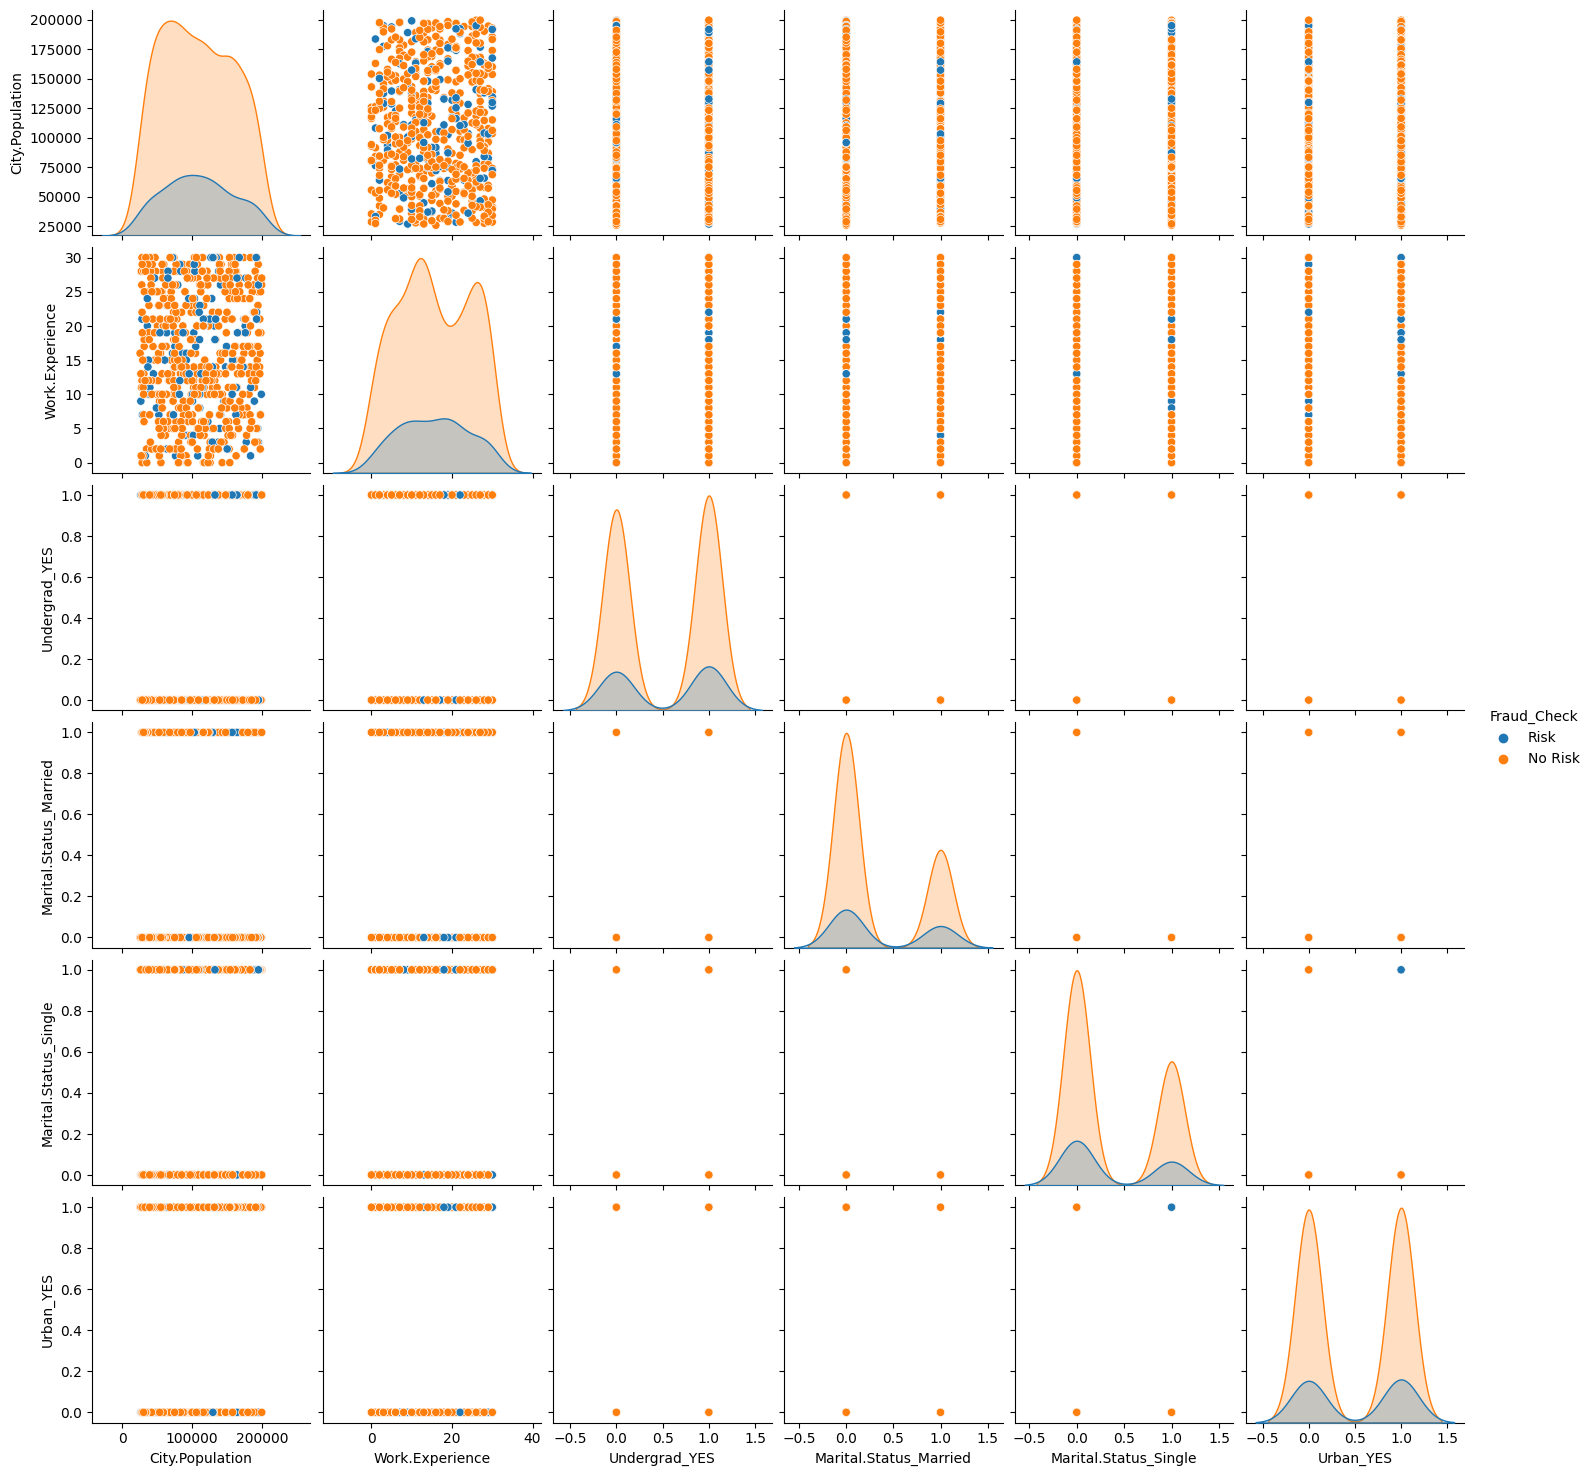

In [16]:
# let's plot pair plot to visualise the attributes all at once
sns.pairplot(data=df, hue = 'Fraud_Check')

<ipython-input-17-aa4f4450a243>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr())


<Axes: >

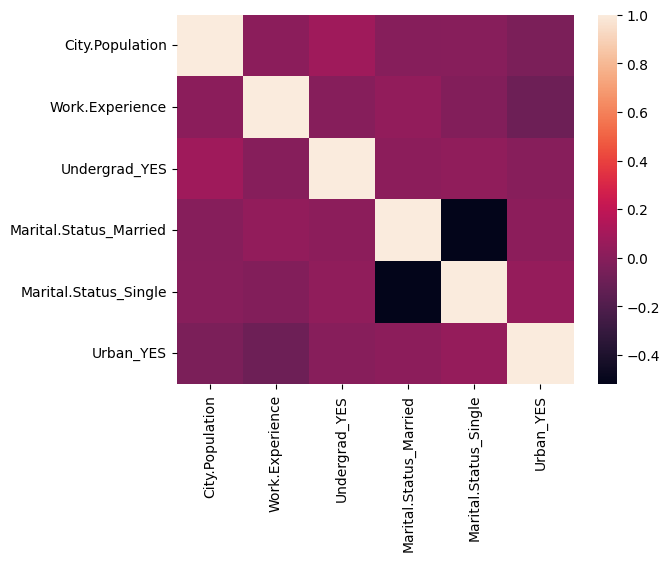

In [17]:
sns.heatmap(df.corr())

# Splitting Data

In [18]:
X=df.iloc[:,0:-1]
y=df.Fraud_Check

In [19]:
X.head()

,City.Population,Work.Experience,Undergrad_YES,Marital.Status_Married,Marital.Status_Single,Urban_YES
0,50047,10,0,0,1,1
1,134075,18,1,0,0,1
2,160205,30,0,1,0,1
3,193264,15,1,0,1,1
4,27533,28,0,1,0,0


In [20]:
X.shape

(600, 6)

In [21]:
y.head()

0    No Risk
1    No Risk
2    No Risk
3    No Risk
4    No Risk
Name: Fraud_Check, dtype: category
Categories (2, object): ['Risk' < 'No Risk']

In [22]:
y.shape

(600,)

# Splitting by Training and Testing Data

In [23]:
 X_train,X_test,y_train,y_test=train_test_split(X,y, test_size=0.30, random_state=44)

In [24]:
X_train.shape

(420, 6)

In [25]:
X_test.shape

(180, 6)

In [26]:
y_train.shape

(420,)

In [27]:
y_test.shape

(180,)

# Building Random Forest Classifier

In [28]:
num_trees = 100 # number of trees
max_features = 3 # number of features
model1 = RandomForestClassifier(n_estimators=num_trees,max_features=max_features)

In [29]:
model1

RandomForestClassifier(max_features=3)

In [30]:
# Evaluate the base model(without hypertuning)

from sklearn.model_selection import StratifiedKFold

cv = StratifiedKFold(n_splits=10,shuffle=True)
result = cross_val_score(model1, X_train, y_train,cv=cv)

print("Accuracy is:",np.mean(result))

Accuracy is: 0.7833333333333333


In [31]:
cv

StratifiedKFold(n_splits=10, random_state=None, shuffle=True)

In [32]:
# Iterating over a range of folds in StratifiedKFold
mean_accuracy=[]
n_folds=[]

for i in range(2,15):
    cv2=StratifiedKFold(n_splits=i,shuffle=True,random_state=20)
    result = cross_val_score(model1, X_train, y_train, cv=cv2)
    avg=np.mean(result)
    mean_accuracy.append(avg)
    n_folds.append(i)

# Visualization

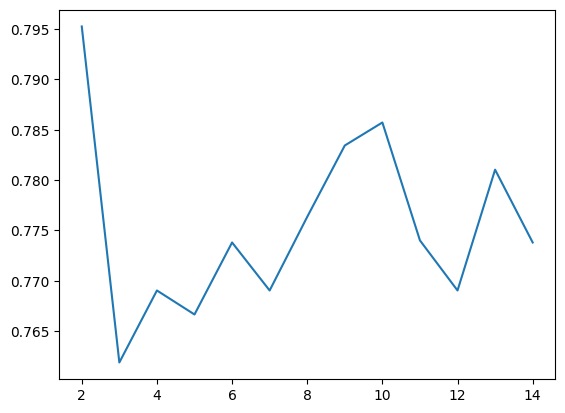

In [33]:
# Accuracy plot
sns.lineplot(x=n_folds,y=mean_accuracy)
plt.show()

# Fitting the model

In [34]:
model1.fit(X_train,y_train)
model1.feature_importances_

array([0.53346136, 0.30963665, 0.04502882, 0.03057903, 0.03363007,
       0.04766406])

In [35]:
# Finding the important features

In [36]:
cols=['City.Population', 'Work.Experience', 'Undergrad_YES','Marital.Status_Married', 'Marital.Status_Single', 'Urban_YES']
feature_imp=pd.Series(model1.feature_importances_,index=cols).sort_values(ascending=False)
feature_imp

City.Population           0.533461
Work.Experience           0.309637
Urban_YES                 0.047664
Undergrad_YES             0.045029
Marital.Status_Single     0.033630
Marital.Status_Married    0.030579
dtype: float64

# Visualization

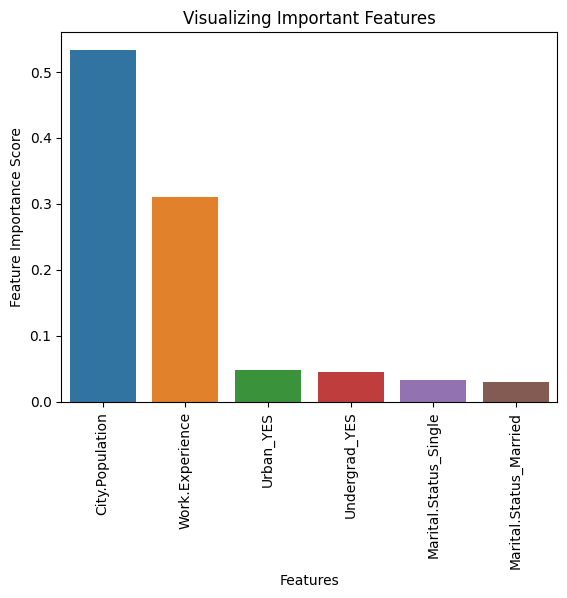

In [37]:
# Creating a bar plot
sns.barplot(y=feature_imp, x=feature_imp.index)
# Add labels to your graph
plt.ylabel('Feature Importance Score')
plt.xlabel('Features')
plt.xticks(rotation=90)
plt.title("Visualizing Important Features")
plt.show()

# prediction

In [38]:
#Predicting on test data
pred1 = model1.predict(X_test)
pd.Series(pred1).value_counts()

No Risk    167
Risk        13
dtype: int64

In [39]:
pred1

array(['No Risk', 'No Risk', 'No Risk', 'No Risk', 'No Risk', 'No Risk',
       'No Risk', 'No Risk', 'No Risk', 'No Risk', 'Risk', 'No Risk',
       'No Risk', 'No Risk', 'No Risk', 'No Risk', 'No Risk', 'No Risk',
       'No Risk', 'No Risk', 'No Risk', 'No Risk', 'Risk', 'No Risk',
       'Risk', 'No Risk', 'Risk', 'No Risk', 'No Risk', 'No Risk',
       'No Risk', 'No Risk', 'No Risk', 'No Risk', 'No Risk', 'No Risk',
       'No Risk', 'No Risk', 'No Risk', 'No Risk', 'No Risk', 'No Risk',
       'No Risk', 'No Risk', 'No Risk', 'No Risk', 'No Risk', 'No Risk',
       'No Risk', 'No Risk', 'No Risk', 'No Risk', 'No Risk', 'No Risk',
       'No Risk', 'No Risk', 'No Risk', 'No Risk', 'No Risk', 'No Risk',
       'No Risk', 'No Risk', 'No Risk', 'No Risk', 'No Risk', 'No Risk',
       'No Risk', 'No Risk', 'No Risk', 'No Risk', 'No Risk', 'No Risk',
       'No Risk', 'No Risk', 'No Risk', 'No Risk', 'Risk', 'No Risk',
       'No Risk', 'No Risk', 'No Risk', 'No Risk', 'No Risk', 'No 

# Accuracy

In [40]:
accuracy_score(pred1,y_test)

0.7055555555555556

In [41]:
from sklearn.metrics import classification_report
print(classification_report(y_test,pred1))

              precision    recall  f1-score   support

     No Risk       0.75      0.92      0.83       136
        Risk       0.15      0.05      0.07        44

    accuracy                           0.71       180
   macro avg       0.45      0.48      0.45       180
weighted avg       0.60      0.71      0.64       180



In [42]:
confusion_matrix(y_test,pred1)

array([[125,  11],
       [ 42,   2]])

## Inference
as we can see the simple model without any hypertuning got 71.11% accuracy which is decent so

This would be the best model here